# Classifying Food Reviews

Data [url](https://drive.google.com/file/d/1dM3Xa4q_ljNTXABwr3rBiOhopj5nNc_t/view?usp=sharing)

!wget https://drive.google.com/file/d/1dM3Xa4q_ljNTXABwr3rBiOhopj5nNc_t/view?usp=sharing

In [ ]:
!wget https://drive.google.com/file/d/1dM3Xa4q_ljNTXABwr3rBiOhopj5nNc_t/view?usp=sharing

In [1]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
from spacy.util import minibatch, compounding

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
food_reviews_df=pd.read_csv('data/Reviews.csv')
food_reviews_df.shape

(568454, 10)

In [3]:
food_reviews_df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
ProductId,B001E4KFG0,B00813GRG4,B000LQOCH0,B000UA0QIQ,B006K2ZZ7K
UserId,A3SGXH7AUHU8GW,A1D87F6ZCVE5NK,ABXLMWJIXXAIN,A395BORC6FGVXV,A1UQRSCLF8GW1T
ProfileName,delmartian,dll pa,"Natalia Corres ""Natalia Corres""",Karl,"Michael D. Bigham ""M. Wassir"""
HelpfulnessNumerator,1,0,1,3,0
HelpfulnessDenominator,1,0,1,3,0
Score,5,1,4,2,5
Time,1303862400,1346976000,1219017600,1307923200,1350777600
Summary,Good Quality Dog Food,Not as Advertised,"""Delight"" says it all",Cough Medicine,Great taffy
Text,I have bought several of the Vitality canned d...,Product arrived labeled as Jumbo Salted Peanut...,This is a confection that has been around a fe...,If you are looking for the secret ingredient i...,Great taffy at a great price. There was a wid...


In [4]:
food_reviews_df = food_reviews_df[['Text', 'Score']].dropna()

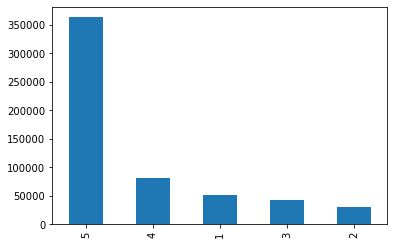

In [5]:
ax=food_reviews_df.Score.value_counts().plot(kind='bar')
fig = ax.get_figure()
fig.savefig("score.png");

In [6]:
food_reviews_df.loc[food_reviews_df.Score <= 3, "Score"] = 0
food_reviews_df.loc[food_reviews_df.Score >= 4, "Score"] = 1

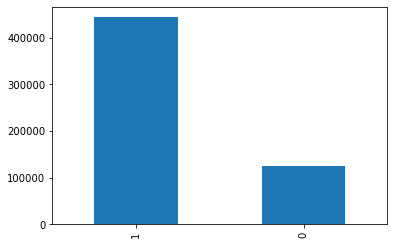

In [7]:
ax=food_reviews_df.Score.value_counts().plot(kind='bar')
fig = ax.get_figure()
fig.savefig("score_boolean.png");

In [8]:
food_reviews_df.head()

,Text,Score
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0
2,This is a confection that has been around a fe...,1
3,If you are looking for the secret ingredient i...,0
4,Great taffy at a great price. There was a wid...,1


In [9]:
train_pos_df=food_reviews_df[food_reviews_df.Score==1][:5000]
train_neg_df=food_reviews_df[food_reviews_df.Score==0][:5000]

In [10]:
train_df=train_pos_df.append(train_neg_df)
train_df.shape

(10000, 2)

## Pre-Processing
### Tokenization

In [11]:
nlp = spacy.load('en_core_web_sm') # create nlp object for English
sample_review = food_reviews_df.Text[101]
sample_review

"Arrived slightly thawed. My parents wouldn't accept it. However, the company was very helpful and issued a full refund."

In [12]:
parsed_review = nlp(sample_review)
parsed_review

Arrived slightly thawed. My parents wouldn't accept it. However, the company was very helpful and issued a full refund.

## Parts of Speech Tagging

In [13]:
tokenized_text = pd.DataFrame()

for i, token in enumerate(parsed_review):
    tokenized_text.loc[i, 'text'] = token.text
    tokenized_text.loc[i, 'lemma'] = token.lemma_,
    tokenized_text.loc[i, 'pos'] = token.pos_
    tokenized_text.loc[i, 'tag'] = token.tag_
    tokenized_text.loc[i, 'dep'] = token.dep_
    tokenized_text.loc[i, 'shape'] = token.shape_
    tokenized_text.loc[i, 'is_alpha'] = token.is_alpha
    tokenized_text.loc[i, 'is_stop'] = token.is_stop
    tokenized_text.loc[i, 'is_punctuation'] = token.is_punct

tokenized_text[:20]

,text,lemma,pos,tag,dep,shape,is_alpha,is_stop,is_punctuation
0,Arrived,arrive,VERB,VBD,ROOT,Xxxxx,True,False,False
1,slightly,"(slightly,)",ADV,RB,advmod,xxxx,True,False,False
2,thawed,"(thaw,)",VERB,VBN,acomp,xxxx,True,False,False
3,.,"(.,)",PUNCT,.,punct,.,False,False,True
4,My,"(my,)",PRON,PRP$,poss,Xx,True,True,False
5,parents,"(parent,)",NOUN,NNS,nsubj,xxxx,True,False,False
6,would,"(would,)",AUX,MD,aux,xxxx,True,True,False
7,n't,"(n't,)",PART,RB,neg,x'x,False,True,False
8,accept,"(accept,)",VERB,VB,ROOT,xxxx,True,False,False
9,it,"(it,)",PRON,PRP,dobj,xx,True,True,False


## Named Entity Recognition (NER)

| Type        | Description                                          |
| :---------- | :--------------------------------------------------- |
| PERSON      | People, including fictional.                         |
| NORP        | Nationalities or religious or political groups.      |
| FAC         | Buildings, airports, highways, bridges, etc.         |
| ORG         | Companies, agencies, institutions, etc.              |
| GPE         | Countries, cities, states.                           |
| LOC         | Non-GPE locations, mountain ranges, bodies of water. |
| PRODUCT     | Objects, vehicles, foods, etc. (Not services.)       |
| EVENT       | Named hurricanes, battles, wars, sports events, etc. |
| WORK_OF_ART | Titles of books, songs, etc.                         |
| LAW         | Named documents made into laws.                      |
| LANGUAGE    | Any named language.                                  |
| DATE        | Absolute or relative dates or periods.               |
| TIME        | Times smaller than a day.                            |
| PERCENT     | Percentage, including "%".                           |
| MONEY       | Monetary values, including unit.                     |
| QUANTITY    | Measurements, as of weight or distance.              |
| ORDINAL     | "first", "second", etc.                              |
| CARDINAL    | Numerals that do not fall under another type         |


In [15]:
from spacy import displacy

displacy.render(parsed_review, style="ent")
# use spacy.explain('tag') if needed

## Dependency parsing

Identifies sentences, assigning a syntactic structure to it (subject-object)

In [16]:
sentence_spans = list(parsed_review.sents)
sentence_spans

[Arrived slightly thawed.,
 My parents wouldn't accept it.,
 However, the company was very helpful and issued a full refund.]

In [17]:
options = {'compact': True, 'bg': 'white','distance': 80,
           'color': 'green', 'font': 'Arial'}
displacy.render(parsed_review, jupyter=True, style='dep', options=options)

## Processing noun chunks 

The dependency parser adds the `token.dep` and `token.head` attributes
Further, it is also responsible for **noun chunks**: detecting sentences and base noun phrases

In [18]:
noun_chunks_df = pd.DataFrame()

for i, chunk in enumerate(parsed_review.noun_chunks):
    noun_chunks_df.loc[i, 'text'] = chunk.text
    noun_chunks_df.loc[i, 'root'] = chunk.root,
    noun_chunks_df.loc[i, 'root.text'] = chunk.root.text,
    noun_chunks_df.loc[i, 'root.dep_'] = chunk.root.dep_
    noun_chunks_df.loc[i, 'root.head.text'] = chunk.root.head.text

noun_chunks_df[:20]

,text,root,root.text,root.dep_,root.head.text
0,My parents,parents,parents,nsubj,accept
1,it,"(it,)","(it,)",dobj,accept
2,the company,"(company,)","(company,)",nsubj,was
3,a full refund,"(refund,)","(refund,)",dobj,issued


## Text Classification

By default, spaCy's text categorizer uses CNN to assign position sensitive vectors to each word in the document. First, prepare the data spaCy expects, in the form of tuples.

In [20]:
train_df['tuples'] = train_df.apply(
    lambda row: (row['Text'],row['Score']), axis=1)
train = train_df['tuples'].tolist()
train[:1]

[('I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.',
  1)]

In [44]:
#functions from spacy documentation
def load_data(limit=0, split=0.8):
    train_data = train
    np.random.shuffle(train_data)
    train_data = train_data[-limit:]
    texts, labels = zip(*train_data)
    cats = [{'POSITIVE': bool(y)} for y in labels]
    split = int(len(train_data) * split)
    return (texts[:split], cats[:split]), (texts[split:], cats[split:])

def evaluate(tokenizer, textcat, texts, cats):
    docs = (tokenizer(text) for text in texts)
    tp = 1e-8  # True positives
    fp = 1e-8  # False positives
    fn = 1e-8  # False negatives
    tn = 1e-8  # True negatives
    for i, doc in enumerate(textcat.pipe(docs)):
        gold = cats[i]
        for label, score in doc.cats.items():
            if label not in gold:
                continue
            if score >= 0.5 and gold[label] >= 0.5:
                tp += 1.
            elif score >= 0.5 and gold[label] < 0.5:
                fp += 1.
            elif score < 0.5 and gold[label] < 0.5:
                tn += 1
            elif score < 0.5 and gold[label] >= 0.5:
                fn += 1
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f_score = 2 * (precision * recall) / (precision + recall)
    return {'textcat_p': precision, 'textcat_r': recall, 'textcat_f': f_score}

#("Number of texts to train from","t" , int)
n_texts=3000
#You can increase texts count if you have more computational power.

#("Number of training iterations", "n", int))
n_iter=10

In [50]:
nlp = spacy.load('en_core_web_sm')

In [74]:
# add the text classifier to the pipeline if it doesn't exist
# nlp.create_pipe works for built-ins that are registered with spaCy
if 'textcat' not in nlp.pipe_names:
    nlp.add_pipe('textcat', last=True)
# otherwise, get it, so we can add labels to it
else:
    textcat = nlp.get_pipe('textcat')

# add label to text classifier
textcat.add_label('POSITIVE')

# load the dataset
print("Loading food reviews data...")
(train_texts, train_cats), (dev_texts, dev_cats) = load_data(limit=n_texts)
print("Using {} examples ({} training, {} evaluation)"
      .format(n_texts, len(train_texts), len(dev_texts)))

#train_data = list(zip(train_texts,
#                      [{'cats': cats} for cats in train_cats]))

train_data = []
for ii in range(len(train_texts)):
    #train_data.append([train_texts[ii], train_cats[ii]])
    Example(predicted, reference)

Loading food reviews data...
Using 3000 examples (2400 training, 600 evaluation)


## Training the model

In [ ]:
# add the text classifier to the pipeline if it doesn't exist
# nlp.create_pipe works for built-ins that are registered with spaCy
if 'textcat' not in nlp.pipe_names:
    textcat = nlp.create_pipe('textcat')
    nlp.add_pipe(textcat, last=True)
# otherwise, get it, so we can add labels to it
else:
    textcat = nlp.get_pipe('textcat')

# add label to text classifier
textcat.add_label('POSITIVE')

# load the dataset
print("Loading food reviews data...")
(train_texts, train_cats), (dev_texts, dev_cats) = load_data(limit=n_texts)
print("Using {} examples ({} training, {} evaluation)"
      .format(n_texts, len(train_texts), len(dev_texts)))
train_data = list(zip(train_texts,
                      [{'cats': cats} for cats in train_cats]))
